<a href="https://colab.research.google.com/github/Marcellinus08/Deep-Learning/blob/main/GRU_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WEEK 5

## GRU Models

### Tensorflow

Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


Persiapan Data

In [2]:
# Load data
url = "https://raw.githubusercontent.com/farrelrassya/teachingMLDL/refs/heads/main/02.%20Deep%20Learning/04.%20Week%204/Dataset/ReviewTokoBaju.csv"
df = pd.read_csv(url)

# Ambil kolom Review dan Rating sebagai input dan label
df = df[['Review Text', 'Rating']].dropna()
df['label'] = (df['Rating'] >= 4).astype(int)

X = df['Review Text'].astype(str)
y = df['label']


Tokenisasi dan Padding

In [3]:
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(X)
X_seq = tokenizer.texts_to_sequences(X)
X_pad = pad_sequences(X_seq, padding='post', maxlen=100)


Split Data

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.2, random_state=42)


Arsitektur Model GRU

In [5]:
model = Sequential([
    Embedding(input_dim=10000, output_dim=64, input_length=100),
    GRU(64, return_sequences=False),
    Dense(1, activation='sigmoid')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Kompilasi dan Training

In [6]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, batch_size=32,
                    validation_split=0.2, verbose=1)


Epoch 1/10
453/453 ━━━━━━━━━━━━━━━━━━━━ 36s 73ms/step - accuracy: 0.7680 - loss: 0.5564 - val_accuracy: 0.7566 - val_loss: 0.5561
Epoch 2/10
453/453 ━━━━━━━━━━━━━━━━━━━━ 42s 76ms/step - accuracy: 0.7884 - loss: 0.4853 - val_accuracy: 0.8631 - val_loss: 0.3171
Epoch 3/10
453/453 ━━━━━━━━━━━━━━━━━━━━ 31s 69ms/step - accuracy: 0.9018 - loss: 0.2471 - val_accuracy: 0.8725 - val_loss: 0.2957
Epoch 4/10
453/453 ━━━━━━━━━━━━━━━━━━━━ 42s 71ms/step - accuracy: 0.9281 - loss: 0.1883 - val_accuracy: 0.8703 - val_loss: 0.3079
Epoch 5/10
453/453 ━━━━━━━━━━━━━━━━━━━━ 32s 71ms/step - accuracy: 0.9545 - loss: 0.1281 - val_accuracy: 0.8648 - val_loss: 0.3700
Epoch 6/10
453/453 ━━━━━━━━━━━━━━━━━━━━ 41s 70ms/step - accuracy: 0.9712 - loss: 0.0903 - val_accuracy: 0.8556 - val_loss: 0.4938
Epoch 7/10
453/453 ━━━━━━━━━━━━━━━━━━━━ 41s 71ms/step - accuracy: 0.9748 - loss: 0.0717 - val_accuracy: 0.8567 - val_loss: 0.5136
Epoch 8/10
453/453 ━━━━━━━━━━━━━━━━━━━━ 41s 71ms/step - accuracy: 0.9827 - loss: 0.0528 - 

Evaluasi Model

In [7]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")


142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.8447 - loss: 0.6251
Test Accuracy: 0.8523


Laporan dan ROC Curve

142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step
              precision    recall  f1-score   support

           0       0.68      0.68      0.68      1045
           1       0.90      0.90      0.90      3484

    accuracy                           0.85      4529
   macro avg       0.79      0.79      0.79      4529
weighted avg       0.85      0.85      0.85      4529

AUC Score: 0.8908457802998259


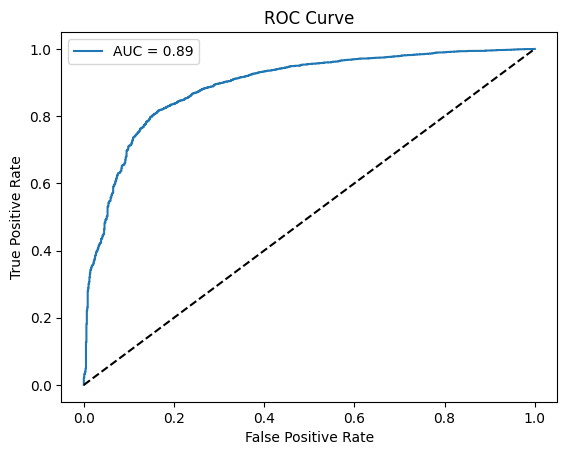

In [8]:
y_pred_prob = model.predict(X_test).ravel()
y_pred = y_pred_prob > 0.5

print(classification_report(y_test, y_pred))
print("AUC Score:", roc_auc_score(y_test, y_pred_prob))

fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_pred_prob):.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


### Pytorch

Import Library

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np


Preprocessing (pake hasil dari TensorFlow tokenizer)

In [10]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.2, random_state=42)

# Convert to tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.long)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)

# Dataset dan DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32)


Model GRU

In [11]:
class GRUModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim):
        super(GRUModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.gru = nn.GRU(embedding_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.embedding(x)
        _, h_n = self.gru(x)
        out = self.fc(h_n[-1])
        return self.sigmoid(out)


Training

In [12]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = GRUModel(vocab_size=10000, embedding_dim=64, hidden_dim=64).to(device)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

for epoch in range(10):
    model.train()
    total_loss = 0
    correct = 0
    total = 0

    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)

        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        correct += ((outputs > 0.5).float() == y_batch).sum().item()
        total += y_batch.size(0)

    print(f"Epoch {epoch+1} - Loss: {total_loss:.4f} - Accuracy: {correct / total:.4f}")


Epoch 1 - Loss: 294.0275 - Accuracy: 0.7753
Epoch 2 - Loss: 179.0504 - Accuracy: 0.8621
Epoch 3 - Loss: 139.0483 - Accuracy: 0.8988
Epoch 4 - Loss: 117.0916 - Accuracy: 0.9172
Epoch 5 - Loss: 98.4510 - Accuracy: 0.9329
Epoch 6 - Loss: 78.8090 - Accuracy: 0.9483
Epoch 7 - Loss: 60.3036 - Accuracy: 0.9636
Epoch 8 - Loss: 45.9187 - Accuracy: 0.9726
Epoch 9 - Loss: 33.7775 - Accuracy: 0.9815
Epoch 10 - Loss: 29.4063 - Accuracy: 0.9838


Evaluasi

              precision    recall  f1-score   support

         0.0       0.76      0.66      0.71      1045
         1.0       0.90      0.94      0.92      3484

    accuracy                           0.87      4529
   macro avg       0.83      0.80      0.81      4529
weighted avg       0.87      0.87      0.87      4529

AUC Score: 0.9190505880608002


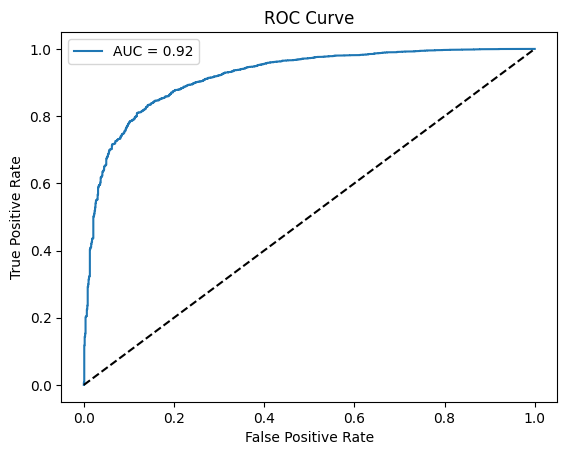

In [13]:
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch = X_batch.to(device)
        outputs = model(X_batch).cpu().numpy()
        all_preds.extend(outputs)
        all_labels.extend(y_batch.numpy())

y_pred = np.array(all_preds) > 0.5
y_true = np.array(all_labels)

print(classification_report(y_true, y_pred))
print("AUC Score:", roc_auc_score(y_true, all_preds))

# ROC Curve
fpr, tpr, _ = roc_curve(y_true, all_preds)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_true, all_preds):.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


### Persamaan Matematika

Update Gate
Mengontrol seberapa banyak informasi dari hidden state sebelumnya yang akan dipertahankan:

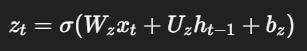

Reset Gate
Mengontrol seberapa banyak informasi dari hidden state sebelumnya yang akan di-reset:

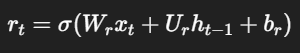

Candidate Hidden State
Kandidat state baru berdasarkan input saat ini dan hasil reset dari hidden sebelumnya:

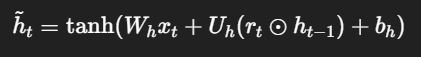

Final Hidden State
Menggabungkan hidden sebelumnya dan kandidat baru berdasarkan update gate:

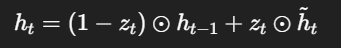

Simbol

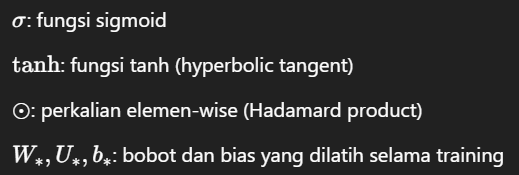

Setelah GRU menghasilkan hidden state terakhir, biasanya diproses lewat:
Linear Layer:
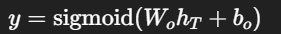

Untuk klasifikasi biner, kita gunakan sigmoid agar hasilnya antara 0 dan 1, kemudian dibandingkan dengan threshold (biasanya 0.5).
